In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ratings = pd.read_csv('data/ratings.csv', encoding='utf-8')
tags = pd.read_csv('data/tags.csv', encoding='utf-8')
movies = pd.read_csv('data/movies.csv', encoding='utf-8')

In [3]:
print(ratings.shape)
print(ratings.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


엑셀에서 EDA 및 데이터 전처리하는 게 용이할 때가 있다. :
* [unique 값을 판단할 때](https://jlim0316.tistory.com/276?category=963501)
* [unique element를 컴마로 연결할 때](https://jlim0316.tistory.com/282?category=963501)
* [기술통계량을 알고자 할 때](https://jlim0316.tistory.com/284?category=963501)
* [공공데이터를 전처리할 때](https://jlim0316.tistory.com/271?category=963501)


엑셀로 보는 EDA는 아래 사진처럼 직관적으로 파악하기 용이한 구조를 가지고 있다.

![adv1_preproc](preproce.png)

<AxesSubplot:>

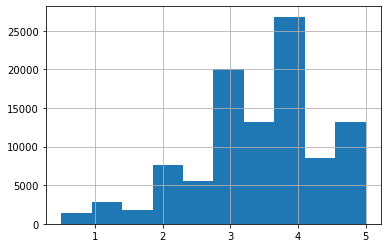

In [6]:
ratings.rating.hist()

In [7]:
ratings.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [8]:
ratings.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [9]:
ratings_by_userid = pd.DataFrame({'movie_cnt': ratings.groupby(['userId', 'rating']).size()})
ratings_by_userid = ratings_by_userid.reset_index()
ratings_by_userid.head(10)

,userId,rating,movie_cnt
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [10]:
stats = pd.DataFrame({
    'movie_cnt': ratings.groupby('userId')['movieId'].count(),
    'rating_avg': ratings.groupby('userId')['rating'].mean(), 
'rating_std': ratings.groupby('userId')['rating'].std()})
stats = stats.reset_index()
stats.head(10)

,userId,movie_cnt,rating_avg,rating_std
0,1,232,4.366379,0.800048
1,2,29,3.948276,0.805615
2,3,39,2.435897,2.090642
3,4,216,3.555556,1.314204
4,5,44,3.636364,0.990441
5,6,314,3.493631,0.850648
6,7,152,3.230263,1.329594
7,8,47,3.574468,0.972328
8,9,46,3.260870,1.272526
9,10,140,3.278571,1.175700


* 사람들이 평가를 많이 남길수록 평점이 좋은 영화인가?

In [11]:
movieid = pd.DataFrame({
    'rating_cnt': ratings.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings.groupby('movieId')['rating'].std()
})


In [12]:
movieid.sort_values(by = "rating_cnt", ascending = False)

,rating_cnt,avg_ratings,std_ratings
movieId,,,
356,329,4.164134,0.831244
318,317,4.429022,0.713019
296,307,4.197068,0.951997
593,279,4.161290,0.853983
2571,278,4.192446,0.975243
...,...,...,...
4093,1,1.500000,NaN
4089,1,2.000000,NaN
58351,1,4.000000,NaN


<AxesSubplot:>

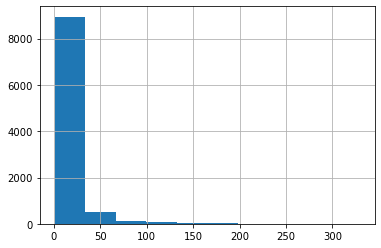

In [13]:
movieid.rating_cnt.hist()

hist를 보면서 rating_cnts가 일정하지 않음을 확인하며 듬성듬성한 matrix, 즉 sparse한 데이터가 만들어지겠구나. 
라고 생각해볼 수 있음

In [14]:
movies.set_index("movieId", inplace = True)
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [15]:
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [16]:
movieid

,rating_cnt,avg_ratings,std_ratings
movieId,,,
1,215,3.920930,0.834859
2,110,3.431818,0.881713
3,52,3.259615,1.054823
4,7,2.357143,0.852168
5,49,3.071429,0.907148
...,...,...,...
193581,1,4.000000,NaN
193583,1,3.500000,NaN
193585,1,3.500000,NaN


In [17]:
movieid = movieid.assign(movie_title = lambda x: movies['title'].loc[x.index])
movieid

,rating_cnt,avg_ratings,std_ratings,movie_title
movieId,,,,
1,215,3.920930,0.834859,Toy Story (1995)
2,110,3.431818,0.881713,Jumanji (1995)
3,52,3.259615,1.054823,Grumpier Old Men (1995)
4,7,2.357143,0.852168,Waiting to Exhale (1995)
5,49,3.071429,0.907148,Father of the Bride Part II (1995)
...,...,...,...,...
193581,1,4.000000,NaN,Black Butler: Book of the Atlantic (2017)
193583,1,3.500000,NaN,No Game No Life: Zero (2017)
193585,1,3.500000,NaN,Flint (2017)


In [18]:
movieid.sort_values(by = 'rating_cnt', ascending = False)

,rating_cnt,avg_ratings,std_ratings,movie_title
movieId,,,,
356,329,4.164134,0.831244,Forrest Gump (1994)
318,317,4.429022,0.713019,"Shawshank Redemption, The (1994)"
296,307,4.197068,0.951997,Pulp Fiction (1994)
593,279,4.161290,0.853983,"Silence of the Lambs, The (1991)"
2571,278,4.192446,0.975243,"Matrix, The (1999)"
...,...,...,...,...
4093,1,1.500000,NaN,Cop (1988)
4089,1,2.000000,NaN,Born in East L.A. (1987)
58351,1,4.000000,NaN,City of Men (Cidade dos Homens) (2007)


<AxesSubplot:>

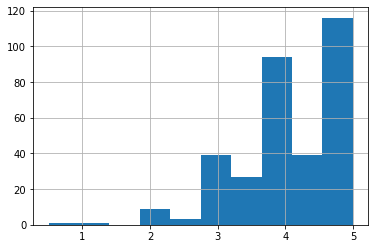

In [19]:
ratings[ratings.movieId == 356]['rating'].hist()

In [20]:
ratings[(ratings.movieId == 356) & (ratings.rating < 2)]

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


<AxesSubplot:>

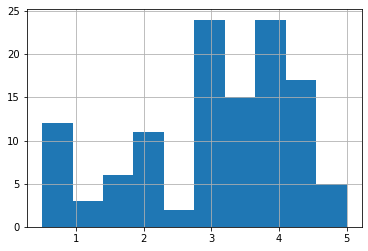

In [21]:
ratings[ratings.userId == 76]['rating'].hist()